In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
pi = np.pi
freq = np.linspace(10, 20000, 10000) # Frequency range
omegas = freq * 2 * pi # Angular frequency
E_0 = 200 # Polarisation voltage (V)
s = 22.5e-6 # Static separation (m)
a = 9e-3 # Diaphragm radius (m)
sigma_0 = 1600 # Static tension (N/m)
rho_d = 1845 # Material density (kg/m^3)
d = 8e-6 # Diaphragm thickness (m)
mu = rho_d * d # Mass per unit area (kg/m^2)
S = pi * a**2 # Diaphragm area (m^2)
c_0 = 340 # Speed of sound (m/s)
rho_0 = 1.2 # Air density (kg/m^3)
K_M = 8 * pi * sigma_0 # Spring constant (N/m)
M_M = 4 / 3 * S * mu # Diaphragm mass (kg)
R_M = 0.6 # Mechanical resistance (Ns/m)
eta_0 = 18e-6 # Air dynamic viscosity (Pa s)
cap_l = 2e-2 # Capsule length (m)
epsilon_0 = 8.854e-12 # Permittivity of free space (F/m)

# Fundamental resonance frequency
f_0 = (2.4 / (2 * pi * a)) * np.sqrt(sigma_0 / mu)

# Output the result
print(f"Diaphragm radius (a): {a*1e3:.2f} mm")
print(f"Static tension (σ₀): {sigma_0:.2f} N/m")
print(f"Density (ρ): {rho_d:.2f} kg/m³")
print(f"Thickness (d): {d*1e6:.2f} µm")
print(f"Mass per unit area (μ): {mu:.4f} kg/m²")
print(f"Fundamental resonance frequency (f₀): {f_0:.2f} Hz")

# Calculate sensitivity (S)
a_squared = a**2 # Square of the diaphragm radius
S = (E_0 * a_squared) / (s * 8 * sigma_0) # Sensitivity in V/Pa
# Convert to decibels
S_dB = 20 * np.log10(S) # Sensitivity in dB (ref 1 V/Pa)

# Print results
print(f"Polarisation Voltage (E_0): {E_0} V")
print(f"Static Separation (s): {s*1e6:.2f} µm")
print(f"Sensitivity (S): {S:.5f} V/Pa")
print(f"Sensitivity in dB (S_dB): {S_dB:.2f} dB (ref 1 V/Pa)")

# Capsule volume and low-frequency limit
cap_V = pi * a**2 * cap_l # Capsule volume
slit_s = 35e-6 # Slit height (m)
slit_w = 50e-6 # Slit width (m)
slit_l = 100e-6 # Slit depth (m)
C_A = cap_V / (rho_0 * c_0**2) # Acoustic compliance
R_A = 12 * eta_0 * slit_l / (slit_s**3 * slit_w) # Airflow resistance
f_l = 1 / (2 * pi * C_A * R_A) # Fundamental low frequency

print(f"Spring Constant (K_M): {K_M:.2e} N/m")
print(f"Diaphragm Mass (M_M): {M_M:.2e} kg")
print(f"Capsule Volume (C_cap): {cap_V:.2e} m³")
print(f"Acoustic Compliance (C_A): {C_A:.2e} m^5/Pa")
print(f"Airflow Resistance (R_A): {R_A:.2e} Ns/m^5")
print(f"Low-Frequency Limit (f_l): {f_l:.2f} Hz")

# Calculate time constant (tau)
T = 1 / 20 # Period of the lowest frequency (s)
tau = 10 * T # Minimum required time constant (s)
# Calculate the diaphragm area
S = pi * a**2 # Diaphragm area (m^2)

# Calculate capacitance (C)
C = epsilon_0 * S / s # Capacitance (F)

# Calculate polarisation resistance (R_p)
R_p = tau / C # Polarisation resistance (Ohms)

# Convert R_p to Gigaohms
R_p_Gigaohms = R_p / 1e9

# Output the results
print(f"Capacitance (C): {C:.2e} F")
print(f"Time Constant (tau): {tau:.2f} s")
print(f"Polarisation Resistance (R_p): {R_p:.2e} Ohms({R_p_Gigaohms:.2f} GΩ)")

# Calculate Qms
Q_ms = (2 * np.pi * f_0 * M_M) / R_M

# Output the result
print("Mechanical Quality Factor (Q_ms): {:.3f}".format(Q_ms))

# Sensitivity
Sen1 = E_0 * S / (s * (1j * omegas * R_M + K_M - M_M * omegas**2))
S_level1 = 20 * np.log10(np.abs(Sen1) / 1) # Sensitivity in dB (ref1 V/Pa)

Diaphragm radius (a): 9.00 mm
Static tension (σ₀): 1600.00 N/m
Density (ρ): 1845.00 kg/m³
Thickness (d): 8.00 µm
Mass per unit area (μ): 0.0148 kg/m²
Fundamental resonance frequency (f₀): 13973.52 Hz
Polarisation Voltage (E_0): 200 V
Static Separation (s): 22.50 µm
Sensitivity (S): 0.05625 V/Pa
Sensitivity in dB (S_dB): -25.00 dB (ref 1 V/Pa)
Spring Constant (K_M): 4.02e+04 N/m
Diaphragm Mass (M_M): 5.01e-06 kg
Capsule Volume (C_cap): 5.09e-06 m³
Acoustic Compliance (C_A): 3.67e-11 m^5/Pa
Airflow Resistance (R_A): 1.01e+10 Ns/m^5
Low-Frequency Limit (f_l): 0.43 Hz
Capacitance (C): 1.00e-10 F
Time Constant (tau): 0.50 s
Polarisation Resistance (R_p): 4.99e+09 Ohms(4.99 GΩ)
Mechanical Quality Factor (Q_ms): 0.733


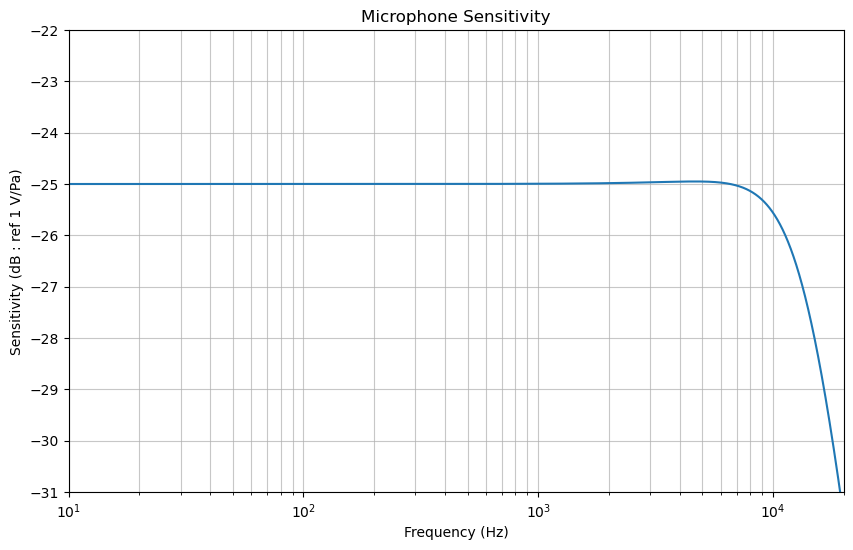

In [6]:
# Plot sensitivity
plt.figure(figsize=(10, 6))
plt.semilogx(freq, S_level1)
plt.title("Microphone Sensitivity")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Sensitivity (dB : ref 1 V/Pa)")
plt.ylim(-31, -22)
plt.xlim(10, 20000)
plt.grid(which="both", axis="both", alpha=0.7)
plt.show()